<h1>Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [3]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    matrixes = [np.array(i) for i in X]
    vectors = [np.array(i) for i in V]
    result = 0
    for k in range(len(matrixes)):
        result += sum(np.dot(matrixes[k], vectors[k]))
    return result


def test_1_1():
    assert sum_prod([[[4, 5],[6, 7], [8, 9]]], [[1, 2]]) == 60


def test_1_2():
    assert sum_prod([[[1, 2],[3, 4], [5, 6]], [[4, 5],[6, 7], [8, 9]]], [[7, 8], [1, 2]]) == 219


print(sum_prod([[[1, 2],[3, 4], [5, 6]], [[4, 5],[6, 7], [8, 9]]], [[7, 8], [1, 2]]))

219


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [4]:
def binarize(M, threshold=0.5):
    M = np.array(M)
    return np.where(M > threshold, 1, 0)


def test_2_1():
    assert binarize([[1, 0.25], [2, 0.1]]) == [[1, 0], [1, 0]]


def test_2_2():
    assert  binarize([[2, 1], [3, -1]], 2) == [[0, 0], [1, 0]]
print(binarize([[1, 0.25], [2, 0.1]], 0.5))

[[1 0]
 [1 0]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [5]:
def unique_rows(mat):
    return [[j for j in np.unique(i)] for i in mat]

def unique_columns(mat):
    return [[j for j in np.unique(i)] for i in np.array(mat).transpose()]


def test_3_1():
    assert unique_rows([[1, 1,1], [2, 2, 2], [3, 3, 3]]) == [[1], [2], [3]]


def test_3_2():
    assert unique_columns([[1, 2, 3], [1, 2, 3], [1, 2, 3]]) == [[1], [2], [3]]

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

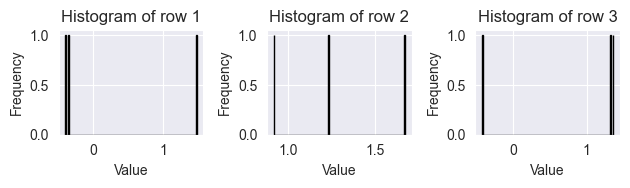

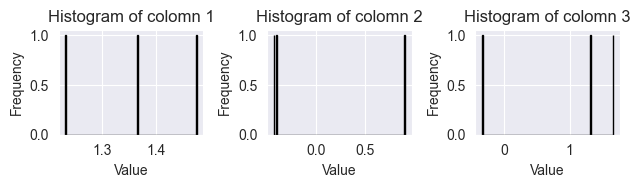

(array([0.24542156, 1.27303844, 0.75321228]),
 array([1.35695604, 0.03056255, 0.88415369]),
 array([0.75626671, 0.09721693, 0.6994664 ]),
 array([0.00993386, 0.39028259, 0.77692942]))

In [6]:
def get_matrix(m, n):
    matrix = np.random.normal(size=(m, n))
    meanrows = np.mean(matrix, axis=1)
    meancolomns = np.mean(matrix, axis=0)
    varrows = np.var(matrix, axis=1)
    varcolomns = np.var(matrix, axis=0)
    for i in range(m):
        ax = plt.subplot(m, n, i + 1)
        ax.hist(matrix[i], edgecolor = 'black', bins=180)
        ax.set_title(f'Histogram of row {i + 1}')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    for i in range(n):
        ay = plt.subplot(n, m, i + 1)
        ay.hist(matrix.transpose()[i], edgecolor = 'black', bins=180)
        ay.set_title(f'Histogram of colomn {i + 1}')
        ay.set_xlabel('Value')
        ay.set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    return meanrows, meancolomns, varrows, varcolomns

get_matrix(3, 3)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [16]:
def chess(m, n, a, b):
    arr = np.zeros((m, n), dtype=int)
    arr[1::2, 1::2] = 1
    arr[::2,::2] = 1
    return np.where(arr == 1, a, b)


def test_5_1():
    assert chess(2, 2, 1, 0) == [[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1]]



def test_5_2():
    assert chess(3, 2, 2, 3) == [[2, 3, 2, 3], [3, 2, 3, 2], [2, 3, 2, 3]]

print(chess(2, 2, 2, 3))

[[2 3]
 [3 2]]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

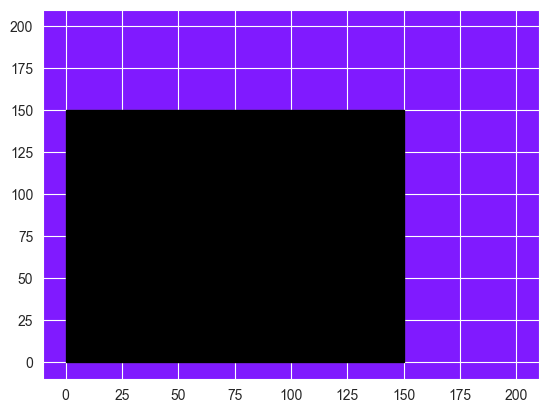

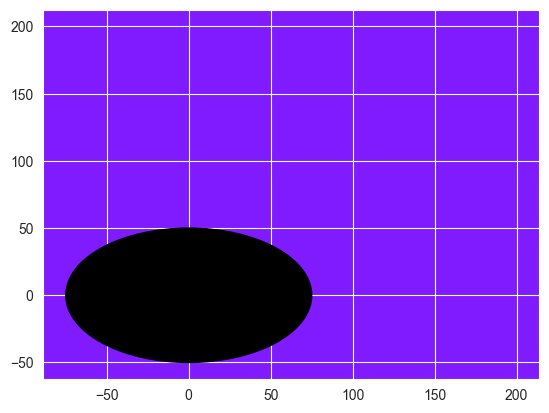

In [8]:
from matplotlib.patches import Rectangle, Ellipse


def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    ig, ax = plt.subplots()
    ax.plot(m, n)
    ax.set_facecolor(background_color)
    ax.add_patch (Rectangle((0, 0), a, b, color=rectangle_color, fill=True))


def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    ig, ax = plt.subplots()
    ax.plot(m, n)
    ax.set_facecolor(background_color)
    ax.add_patch (Ellipse((0, 0), a, b, color=ellipse_color, fill=True))
    pass

draw_rectangle(150, 150, 200, 200, (0, 0, 0), (0.5, 0.1, 1))
draw_ellipse(150, 100, 200, 200, (0, 0, 0), (0.5, 0.1, 1))

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [9]:
def get_data(array, window_size):
    array = np.array(array)
    mean_value = np.mean(array)
    var_value = np.var(array)
    std_value = np.std(array)
    maxs = np.r_[True, array[1:] > array[:-1]] & np.r_[array[:-1] > array[1:], True]
    mins = np.r_[True, array[1:] < array[:-1]] & np.r_[array[:-1] < array[1:], True]
    i = 0
    moving_averages = []
    while i < len(array) - window_size + 1:
        window_average = round(np.sum(array[i:i+window_size]) / window_size, 2)
        moving_averages.append(window_average)
        i += 1
    return mean_value, var_value, std_value, maxs, mins, moving_averages

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [10]:
def one_hot_encoding(array):
    a = np.array(array)
    b = np.zeros((a.size, a.max() + 1))
    b[np.arange(a.size), a] = 1
    return b


print(one_hot_encoding([0,2,3,0]))

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
